In [74]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [247]:
pd.set_option('display.width', None)


In [256]:
file_path = '/Users/anton/Downloads/data.xlsx'


In [257]:
df = pd.read_excel(file_path)

In [250]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
client_id,724.0,183.084254,106.590761,6.0,86.0000,194.00,273.00,398.0
sum,724.0,7162.542030,6308.571297,23.7,3114.7325,5207.99,8934.95,39713.5
Unnamed: 5,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [258]:
df.columns = ['client_id', 'sum', 'status', 'sale', 'new_current', 'Unnamed', 'document', 'receiving_date']
df = df.drop(columns=['Unnamed'])

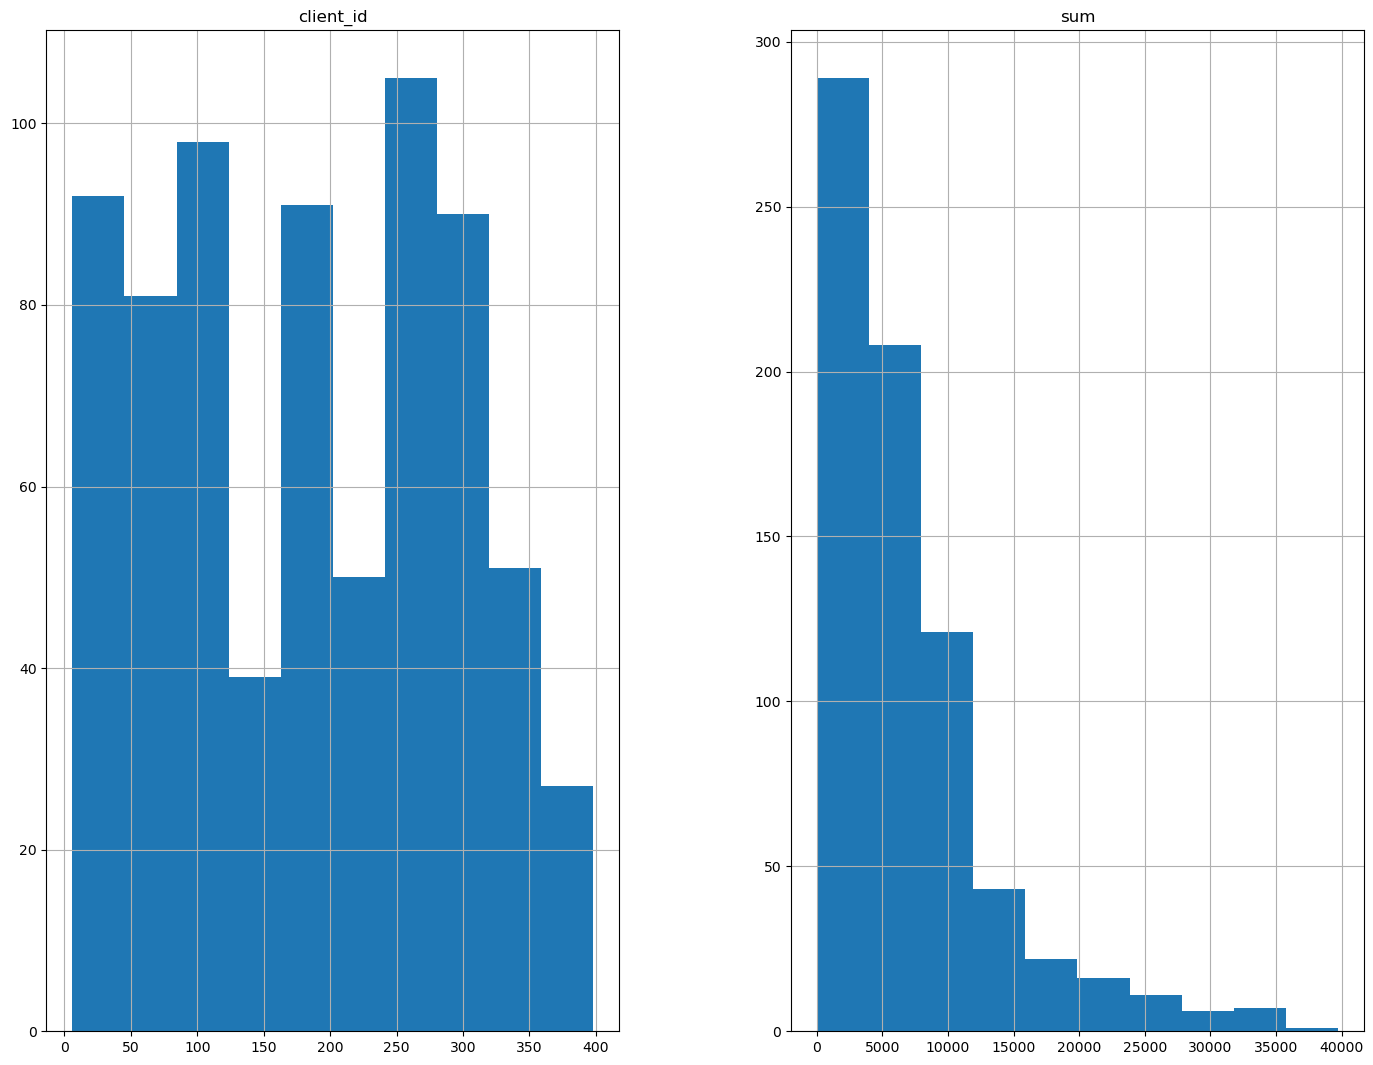

In [259]:
p = df.hist(figsize = (17,13))

In [260]:
df.isnull().sum()

client_id           6
sum                 6
status              0
sale                6
new_current         6
document           21
receiving_date    123
dtype: int64

In [261]:
df.duplicated().sum()

33

In [237]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   client_id       724 non-null    float64
 1   sum             724 non-null    float64
 2   status          730 non-null    object 
 3   sale            724 non-null    object 
 4   new_current     724 non-null    object 
 5   document        709 non-null    object 
 6   receiving_date  607 non-null    object 
dtypes: float64(2), object(5)
memory usage: 40.1+ KB


In [238]:
df.shape

(730, 7)

## 1) Вычислите общую выручку за июль 2021 по тем сделкам, приход денежных средств которых не просрочен.

In [262]:
current_month = None

for i, row in df.iterrows():
    
    if pd.isna(row['client_id']) and isinstance(row['status'], str):
        current_month = row['status']  # Обновляем текущий месяц
        print(current_month)
    else:
        df.at[i, 'deal_month'] = current_month

Май 2021
Июнь 2021
Июль 2021
Август 2021
Сентябрь 2021
Октябрь 2021


In [263]:
df['receiving_date'] = pd.to_datetime(df['receiving_date'], errors='coerce')

/var/folders/9h/gmnvxz2112dg5zpftrkg0td40000gn/T/ipykernel_36943/870839572.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['receiving_date'] = pd.to_datetime(df['receiving_date'], errors='coerce')


In [264]:
df.sample(20)

,client_id,sum,status,sale,new_current,document,receiving_date,deal_month
340,242.0,7733.7,ОПЛАЧЕНО,Петрова,текущая,оригинал,2021-08-30,Июль 2021
249,267.0,2678.7,ОПЛАЧЕНО,Васильев,новая,оригинал,2021-09-03,Июнь 2021
685,211.0,1953.7,В РАБОТЕ,Андреев,текущая,оригинал,2021-11-12,Октябрь 2021
170,78.0,8893.7,ОПЛАЧЕНО,Васильев,текущая,оригинал,2021-08-05,Июнь 2021
410,101.0,3553.7,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-09-13,Август 2021
417,294.0,3743.7,ОПЛАЧЕНО,Соколов,текущая,оригинал,2021-09-14,Август 2021
336,296.0,22248.7,ОПЛАЧЕНО,Смирнов,новая,оригинал,2021-08-12,Июль 2021
329,200.0,6021.7,ОПЛАЧЕНО,Андреев,текущая,оригинал,2021-08-12,Июль 2021
103,228.0,1933.7,ОПЛАЧЕНО,Смирнов,текущая,оригинал,2021-07-13,Май 2021
281,49.0,7203.7,ОПЛАЧЕНО,Петрова,текущая,оригинал,2021-09-06,Июль 2021


In [265]:
df_filtered = df[(df['deal_month'] == 'Июль 2021') & (df['status'] == 'ОПЛАЧЕНО')]

In [266]:
df_filtered.sample(5)

,client_id,sum,status,sale,new_current,document,receiving_date,deal_month
318,165.0,9780.70,ОПЛАЧЕНО,Петрова,текущая,оригинал,2021-08-04,Июль 2021
291,87.0,14143.70,ОПЛАЧЕНО,Смирнов,текущая,оригинал,2021-08-09,Июль 2021
297,101.0,3553.70,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-08-05,Июль 2021
262,21.0,4313.70,ОПЛАЧЕНО,Кузнецова,текущая,оригинал,2021-09-17,Июль 2021
324,176.0,2714.98,ОПЛАЧЕНО,Петрова,текущая,оригинал,2021-08-11,Июль 2021


In [267]:
total_revenue = df_filtered['sum'].sum()

In [268]:
total_revenue

859896.4699999997

## 2)Как изменялась выручка компании за рассматриваемый период? Проиллюстрируйте графиком.

In [269]:
df_paid = df[df['status'] == 'ОПЛАЧЕНО']
monthly_revenue = df_paid.groupby('deal_month')['sum'].sum().reset_index()


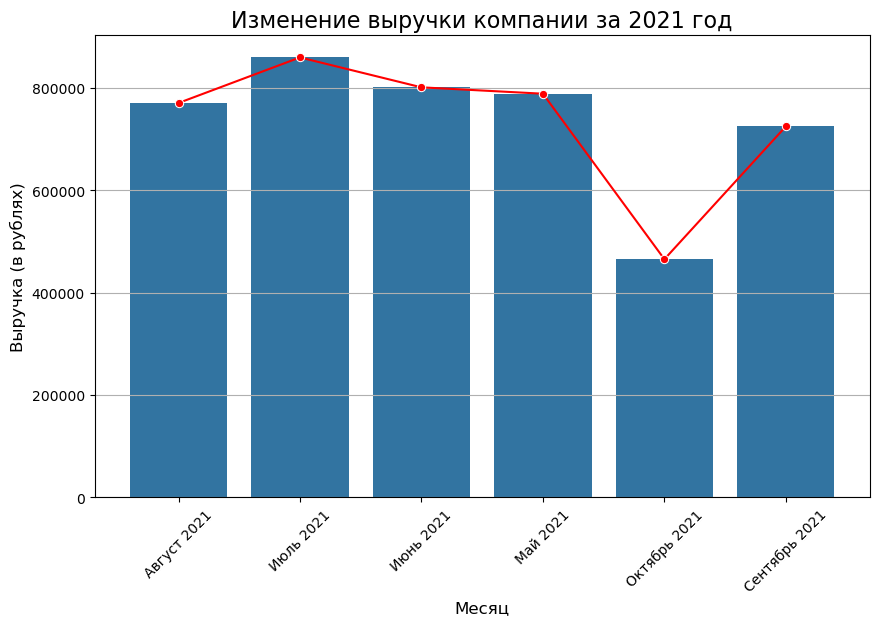

In [270]:
monthly_revenue.columns = ['Месяц', 'Выручка']

plt.figure(figsize=(10, 6))
sns.barplot(x='Месяц', y='Выручка', data=monthly_revenue)
sns.lineplot(x='Месяц', y='Выручка', data=monthly_revenue, marker='o', color='red')

plt.title('Изменение выручки компании за 2021 год', fontsize=16)
plt.ylabel('Выручка (в рублях)', fontsize=12)
plt.xlabel('Месяц', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.show()

## 3)Кто из менеджеров привлек для компании больше всего денежных средств в сентябре 2021?

In [271]:
df_september = df[(df['deal_month'] == 'Сентябрь 2021') & (df['status'] == 'ОПЛАЧЕНО')]

In [272]:
manager_revenue = df_september.groupby('sale')['sum'].sum().reset_index()

In [273]:
top_manager = manager_revenue.loc[manager_revenue['sum'].idxmax()]

top_manager

sale     Смирнов
sum     205258.3
Name: 6, dtype: object

## 4)Какой тип сделок (новая/текущая) был преобладающим в октябре 2021?

In [274]:
df_october = df[(df['deal_month'] == 'Октябрь 2021')]

deal_type_count = df_october['new_current'].value_counts()

dominant_deal_type = deal_type_count.idxmax()

print(f'Преобладает вид сделок "{dominant_deal_type}"') 
deal_type_count

Преобладает вид сделок "текущая"


new_current
текущая    99
новая      36
Name: count, dtype: int64

## 5)Сколько оригиналов договора по майским сделкам было получено в июне 2021?

In [275]:
# Фильтруем майские сделки (Май 2021)
df_may = df[df['deal_month'] == 'Май 2021']

df_may_june_docs = df_may[(df_may['receiving_date'].between('2021-06-01', '2021-06-30')) & 
                          (df_may['document'].notna()) & 
                          (df_may['document'] != 'НЕТ')]

received_in_june_count = df_may_june_docs.shape[0]

received_in_june_count


76

## Задание:
За каждую заключенную сделку менеджер получает бонус, который рассчитывается
следующим образом.
1) За новые сделки менеджер получает 7 % от суммы, при условии, что статус
оплаты «ОПЛАЧЕНО», а также имеется оригинал подписанного договора с
клиентом (в рассматриваемом месяце).
2) За текущие сделки менеджер получает 5 % от суммы, если она больше 10 тыс.,
и 3 % от суммы, если меньше. При этом статус оплаты может быть любым,
кроме «ПРОСРОЧЕНО», а также необходимо наличие оригинала подписанного
договора с клиентом (в рассматриваемом месяце).
Бонусы по сделкам, оригиналы для которых приходят позже рассматриваемого
месяца, считаются остатком на следующий период, который выплачивается по мере
прихода оригиналов. Вычислите остаток каждого из менеджеров на 01.07.2021.

In [277]:
df_before_july = df[df['deal_month'].isin(['Май 2021', 'Июнь 2021'])]


In [278]:
df_with_late_receiving = df_before_july[df_before_july['receiving_date'] > pd.to_datetime('2021-06-30')].copy()

In [276]:
def calculate_bonus(row):
    if pd.notna(row['document']) and row['document'] != 'НЕТ':
        if row['new_current'] == 'новая' and row['status'] == 'ОПЛАЧЕНО':
            return 0.07 * row['sum']  
        elif row['new_current'] == 'текущая' and row['status'] != 'ПРОСРОЧЕНО':
            if row['sum'] > 10000:
                return 0.05 * row['sum']  
            else:
                return 0.03 * row['sum']  
    return 0 

In [279]:
df_with_late_receiving['bonus'] = np.nan

In [280]:
df_with_late_receiving['bonus'] = df_with_late_receiving['bonus'].astype(float)

In [281]:
df_with_late_receiving.loc[:, 'bonus'] = df_with_late_receiving.apply(calculate_bonus, axis=1)

In [282]:
manager_bonus_remaining = df_with_late_receiving.groupby('sale')['bonus'].sum().reset_index()

In [283]:
manager_bonus_remaining

,sale,bonus
0,Андреев,3945.8297
1,Васильев,1037.0490
2,Иванов,5991.4520
3,Кузнецова,4496.9501
4,Петрова,10770.7474
5,Селиванов,5297.6900
6,Смирнов,6430.2650
7,Соколов,269.2110
8,Филимонова,2317.9579


,sale,bonus
0,Андреев,3945.8297
1,Васильев,1037.0490
2,Иванов,5991.4520
3,Кузнецова,4496.9501
4,Петрова,10770.7474
5,Селиванов,5297.6900
6,Смирнов,6430.2650
7,Соколов,269.2110
8,Филимонова,2317.9579
